In [9]:
from KC_methods import entropy, calc_KC76
import numpy as np

n = 250

string = "01" * n
num_bits = len(string)  # Number of bits in the string

strings = []

for i in range(100000):
    # Generate a random number between 0 and 10
    x = np.random.randint(0, n//2)

    indices_to_flip = np.random.choice(num_bits, x, replace=False)

    string_array = np.array(list(string))

    # Flip the bits at the selected indices using NumPy's array indexing
    string_array[indices_to_flip] = np.where(string_array[indices_to_flip] == '0', '1', '0')

    flipped_string = ''.join(string_array)
    strings.append(flipped_string)

In [10]:
import pandas as pd

df = pd.DataFrame()

df["seq"] = strings

df["entropy"] = df["seq"].apply(entropy)
df["KC"] = df["seq"].apply(calc_KC76)

df

,seq,entropy,KC
0,0101010101010100010101000101010101010101010111...,499.630607,300.353774
1,1001010100010011000100010110010101011101001101...,499.532466,461.737891
2,0101010101010101010101010101010111010101010101...,499.976917,76.209166
3,0101010101011001010011010101010001010101010101...,499.948062,390.011616
4,0000110101110011010101010101110011010110010101...,499.948062,475.186567
...,...,...,...
99995,0000000101010101011101110101110101010101110110...,499.907664,394.494509
99996,0101010101010101010101010101010100010101110101...,499.532466,138.969656
99997,0101010000000101110111010101010101010001110101...,499.976917,376.562940
99998,0101010101010101010101010101010101010111010101...,499.976917,116.555196


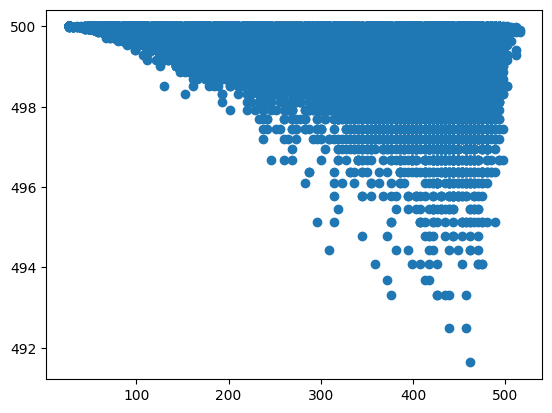

In [11]:
import matplotlib.pyplot as plt

plt.scatter(df["KC"],df["entropy"])